# Classical Support Vector Machine

We start with classical support vector machine. 

* The supervised classification ML algorithm
    * Two or more classes
    
* Split the feature space (X) by a set of hyperplanes to end up with regions of the same type. 

* Algorithm was developed 1960's by Vapnik and Chervonenkis, 1990's Boser, Guyon and Vapnik added the "kernel" trick, which allows to define non-linear classifier (which we will need for QSVM).

* Usage is across various fields 


# What is SVM doing?

Let us show what is the SVM algorithm aims to achieve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

In [2]:
# Create synthetic data 

X, y = make_blobs(n_samples=100, centers=2, random_state=42)

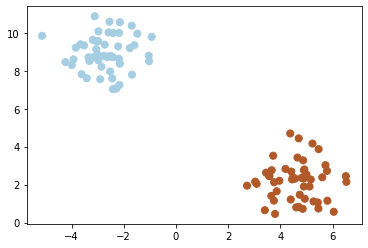

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)


***
***
* The Support Vector Machine algorithm aims to split the plane into halfs such that two classes are separated. 

* Let us discuss the mechanics laters and illustrate how it is being done. 

***
***

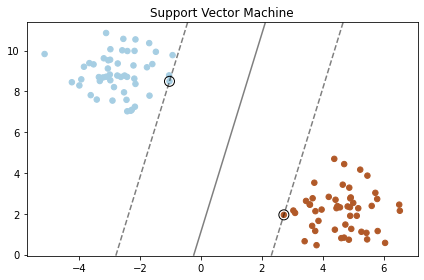

In [4]:
# Define SVM
clf = LinearSVC(C=1, loss="hinge", random_state=42).fit(X, y)

# Get the support vectors from decision function
decisionFunction = clf.decision_function(X)
# The support vectors are the observations that lie within the margin of the boundary 
svI = np.where(np.abs(decisionFunction) <= 1 + 1e-15)[0]
sv = X[svI]

# Plot the support vectors with margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(
    xx,
    yy,
    Z,
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    sv[:, 0],
    sv[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title("Support Vector Machine")
plt.tight_layout()

# We may plot it few times...
pltLinearSVM=plt
pltLinearSVM.show()


  

***

# The Linear SVM

We start with classical linear svm.

* Linear -- we will use lines/planes to cut the feature space

The problem is defined as follows:

* Let us consider dataset $(X_1,y_1),\dots,(X_n,y_n)$, $n$ points, where:
    * $X$ is an independent variable (feature) of dimension>=1
    * $y$ dependent variable denoting class, convention is $-1,1$

Objective of the Linear SVM is to find a hyperplane such that:

1) It splits the two classes 

2) Maximises the margin between the two classes

Refresher:

* Hyperplane can be written as:

$$a^T x - b = 0\,$$

where $a$ is a normal vector of the hyperplane and $b$ is proportional to offset of the hyperplane from the origin (if $a$ is normalised, this is distance to origin).

***






***
# Hard Margin

* If the data are linearly separable, we can use the "hard margin" to separate the two classes. 

* In this case, the margin between two classes can be expressed as follow:

We find two parallel hyperplanes $A1$ and $A2$ such that

    * all points that lie on or above $A1$ are in one class
    * all points that lie on or above $A2$ are in the other class
    
Thus, the two hyperplanes can be expressed as:

$$A1: a_1^Tx - b_1 = 0\,,\,A2:a_2^Tx - b_2 = 0\,$$
 
with points satisfying

$$a_1^T x -b_1\geq 0\,,$$
belonging to one class, while points

$$a_2^T x -b_2\leq 0\,,$$
belonging to the other class.

* The maximum-margin hyperplane is the hyperplane lying in between the two.

* Given both are parallel, we can write $a_1 = a_2$ (or up to magnidute).

Further, it is convention in the the SVM literature to write the two hyperplanes as:

$$a^T x - b = 1\,, $$
and
$$a^T x - b = -1\,. $$

We have normalised $a$ such that we can write different between $b_1$ and $b_2$ as 2. 


The constrain can then be written as:

$$a^T x - b \geq 1\,, $$

for class with $y=1$ and
$$a^T x - b \leq -1\,, $$
for class with $y=-1$.

***

***
## Hard margin optimisation problem

The hard margin constrain for the two classes can be written as one:

$$y(a^T x - b)\geq 1$$

for every observation $(x,y)$. This is due to conveniently denoting classes as $a$ and $-1$. 

The normal vector $a$ has determines the distance between the two hyperplanes, namely

$$d=\frac{2}{||a||}$$

This brings us to the formulation of the Linear SVM with hard marginas optimisation problem:

$$min ||a||$$

s.t.

$$y(a^T x - b)\geq 1$$

for every $(x,y)$. 


***

***
## Support Vectors

The margin/hyperplanes are determined by the points closest to the hyperplanes which splits the two classes.

The other points are not important! 

(see fig above)


***

![transpile](Figs/SVM_hardMargin.png)

***
# Soft Margin

What if the different classes are not linearly sepatrable?

***

In [5]:
# Create synthetic data 

X, y = make_blobs(n_samples=100, centers=2, random_state=0)

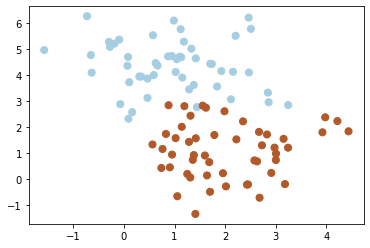

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

***
This is an example of the two classes, which cannot be separated by a hyperplane (line in this case).

How the classification looks in this case?
***

/Users/jannovotny/opt/anaconda3/envs/qiskit/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


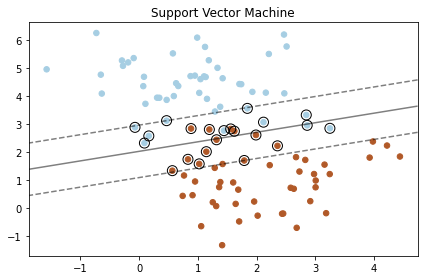

In [7]:
# Define SVM
clf = LinearSVC(C=1, loss="hinge", random_state=42).fit(X, y)

# Get the support vectors from decision function
decisionFunction = clf.decision_function(X)
# The support vectors are the observations that lie within the margin of the boundary 
svI = np.where(np.abs(decisionFunction) <= 1 + 1e-15)[0]
sv = X[svI]

# Plot the support vectors with margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(
    xx,
    yy,
    Z,
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    sv[:, 0],
    sv[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title("Support Vector Machine")
plt.tight_layout()

# We may plot it few times...
pltLinearSVM=plt
pltLinearSVM.show()


  

***
Data are not separable -- there is no hard margin between then -- so we introduce a soft margin and penalise the points within the margin by a loss function.

Loss function: Popular choice is a hinge loss function:

$$Hinge(x) = \max (0,x)\,.$$

In the context of the SVM, what we aim to achieve is to assign zero loss to points on the right side of the margin, and some loss -- proportionate to the distance -- for the points on the wrong side. 

The hinge loss reads:

$$\max(0,1-y*(a^T x - b))\,,$$

for every observation $(x,y)$.

Given the data set $(x_1,y_1),\dots,(x_n,y_n)$, the goal is:

$$\lambda ||a||^2+\left[\frac{1}{n}\sum_{j=1}^{n} \max(0,1-y_j*(a^T x_j - b))\right]\,,$$

with $\lambda$ being penalty (regularisation) of the normal vector. 


***

![transpile](Figs/SVM_softMargin.png)

## Example

Let us explore the regularisation. We try different penalty $C$.

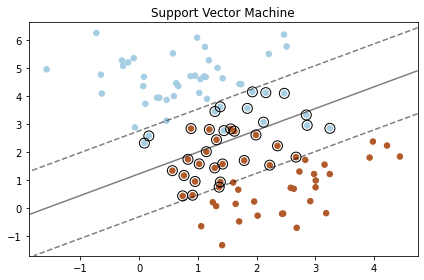

In [8]:
# Define SVM
clf = LinearSVC(C=0.1, loss="hinge", random_state=42).fit(X, y)

# Get the support vectors from decision function
decisionFunction = clf.decision_function(X)
# The support vectors are the observations that lie within the margin of the boundary 
svI = np.where(np.abs(decisionFunction) <= 1 + 1e-15)[0]
sv = X[svI]

# Plot the support vectors with margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(
    xx,
    yy,
    Z,
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    sv[:, 0],
    sv[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title("Support Vector Machine")
plt.tight_layout()

# We may plot it few times...
pltLinearSVM=plt
pltLinearSVM.show()


  

***
# Kernel Trick

In the case of highly non-linear data, we may need an extra trick!
***

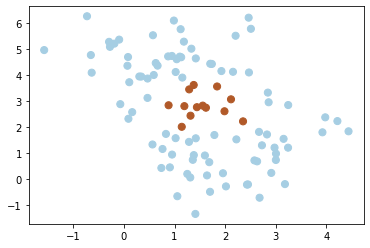

In [9]:
# Create synthetic data 

X, y = make_blobs(n_samples=100, centers=2, random_state=0)
yNew = []
# Create co-centric blobs
for Xi, yi in zip(X, y):
    if (np.mean(X[:, 0])-Xi[0])**2+(np.mean(X[:, 1])-Xi[1])**2<1:
        yN = 1
    else:
        yN = 0
    yNew.append(yN)

plt.scatter(X[:, 0], X[:, 1], c=yNew, s=50, cmap=plt.cm.Paired)



***
Remark: We can use make_circles instead of make blobs, but why not to try to create a data set as we want.

***

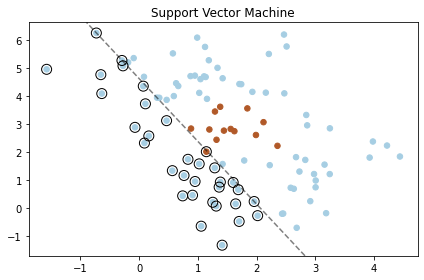

In [10]:
# Define SVM
clf = LinearSVC(C=0.1, loss="hinge", random_state=42).fit(X, yNew)

# Get the support vectors from decision function
decisionFunction = clf.decision_function(X)
# The support vectors are the observations that lie within the margin of the boundary 
svI = np.where(np.abs(decisionFunction) <= 1 + 1e-15)[0]
sv = X[svI]

# Plot the support vectors with margin
plt.scatter(X[:, 0], X[:, 1], c=yNew, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(
    xx,
    yy,
    Z,
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    sv[:, 0],
    sv[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title("Support Vector Machine")
plt.tight_layout()

# We may plot it few times...
pltLinearSVM=plt
pltLinearSVM.show()


  

***
This is really bad fit!

Let us try an ad-hoc data transformation -- we add another dimension!
***

In [11]:
zNew = []
for x in X:
    zNew.append((np.mean(X[:, 0])-x[0])**2+(np.mean(X[:, 1])-x[1])**2) 

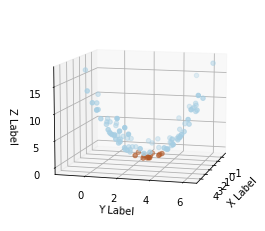

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], zNew,c=yNew, cmap=plt.cm.Paired)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(elev=10., azim=15)
plt.show()

***
This can be separated by a hyper-plane! 
***

***
## Kernel Trick

The idea:

* We project the $X$ onto a higher dimensional space

* We apply the hyperplane (in the increased number of dimensions)

Example:

Let us consider:

$$X = (x_1,x_2)\,,$$

then we introduce additional dimension as

$$\tilde{X} = f(X) = (x_1, x_2, x_1^2+x_2^2)\,,$$

and we apply the hyperplane classification in higher dimension. Once we split the new feature space with optimal hyperplane, we need to project it back to original space. 

We will achieve this by transforming data (actually the dot product of the features) using kernels. 

***

***
## Primal and Dual Problem to Soft-Margin

The soft-margin optimisation reads:

$$\lambda ||a||^2+\left[\frac{1}{n}\sum_{j=1}^{n} \max(0,1-y_j*(a^T x_j - b))\right]\,,$$

We can write the optimisation problem as a constrained optimisation problem. There are two formulations:

### Primal Problem

The optimisation can be written as:

$$\min \frac{1}{n}\sum_{j=1}^{n}\gamma_j + \lambda ||a||^2\,,$$

s.t.

$$y_j*(a^T x_j - b)\geq 1-\gamma_j\,,$$
$$\gamma_j\geq 0\,,$$

for every $j$.

We have thus introduced a new variable $\gamma_j$ for every $j$ as

$$\gamma_j=\max (0, 1-y_j*(a^T x_j - b))\,.$$


***

***
### Dual Problem

We can also solve the dual problem (using the duality principle in the optimisation problems):

$$\max \sum_{j=1}^{n} \xi_j - \frac{1}{2}\sum_{j=1}^{n}\sum_{k=1}^{n} y_j\xi_j (x_j^T x_k) \xi_k y_k\,,$$

s.t.

$$\sum_{j=1}^{n} \xi_j y_j = 0\,,$$

$$0\leq \xi_j \leq \frac{1}{2 n \lambda}\,.$$

This problem is a quadratic optimisation problem, which is efficiently solvable.

Variables $\xi_j$ are provided as 

$$a = \sum_{j=1}^{n} \xi_j y_j x_j\,.$$

Further $\xi_j=0$ iff $j$-th observation is correctly classified (the correct side of boundary), and $0\leq \xi_j \leq \frac{1}{2 n \lambda}$ iff the $j$-th observation is in the margin region.

The point which is on the margin boundary allows us to calculate $b$, which is not given by the set of constraints above:

$$y_b*(a^T*x_b-b)=1\,,$$

where the index $b$ denotes the boundary.

***

***
### Kernel Trick in the Dual Problem

The dual formulation is suitable for introduction of the kernel trick. We have introduced the projection into higher dimension as:

$$ X \to f(X)\,.$$

In the dual problem, the feature appears in the dot product only:

$$(x_j^T x_k) = x_j \cdot x_k\,,$$

which in the transformed feature space reads:

$$f(x_j) \cdot f(x_k)\,.$$

We denote this term as kernel:

$$k(x_j,x_k) = f(x_j) \cdot f(x_k)\,.$$

The vector specifying the hyperplane 

$$a = \sum_{j=1}^{n} \xi_j y_j f(x_j)\,.$$

Let us rewrite the optimisation problem:

$$\max \sum_{j=1}^{n} \xi_j - \frac{1}{2}\sum_{j=1}^{n}\sum_{k=1}^{n} y_j\xi_j (f(x_j) \cdot f(x_k)) \xi_k y_k $$

$$=\max \sum_{j=1}^{n} \xi_j - \frac{1}{2}\sum_{j=1}^{n}\sum_{k=1}^{n} y_j\xi_j k(x_j,x_k) \xi_k y_k $$

s.t.

$$\sum_{j=1}^{n} \xi_j y_j = 0\,,$$

$$0\leq \xi_j \leq \frac{1}{2 n \lambda}\,.$$

The problem is still the quadratic optimisation problem. 

The margin width $b$ can we obtained using the same logic: We find a point on the margin boundary -- with index $b$ -- and for such a point, we calculate:

$$b = a^T f (x_b) - y_b $$

$$ = \sum_{j=1}^{n} \xi_j y_j f(x_j) \cdot f(x_b) - y_b $$

$$ = \sum_{j=1}^{n} \xi_j y_j k(x_j,x_b) - y_b \,.$$

This concludes the introduction of the kernel trick in the dual formulation of the soft-margin problem. 

***

***
### Popular kernels 

There is a number of popular kernel used in the practice:

* Gaussian radial basis function (rbf):

$$k(x_j,x_k) = e^{-\frac{1}{2\sigma^2}||x_j-x_k||^2} $$

* Polynomial function:

$$k(x_j,x_k) = (x_j \cdot x_k + \omega)^d $$

where special case of $\omega=0$ is called homogenous polynomial; further, $d=1$ gives the linear kernel. 

In the many practical examples, the rbf is chosen. 

... we will later introduce another kernel, which brings us to QSVM. 

***

External link to interactive kernel exploration.

[kernel trick](https://chart-studio.plotly.com/create/?fid=SolClover:19#/)

***
Let us explore couple more examples.

We create three datasets:

    * Linearly sepaparable
    * Co-centric data set
    * Moons
    
***

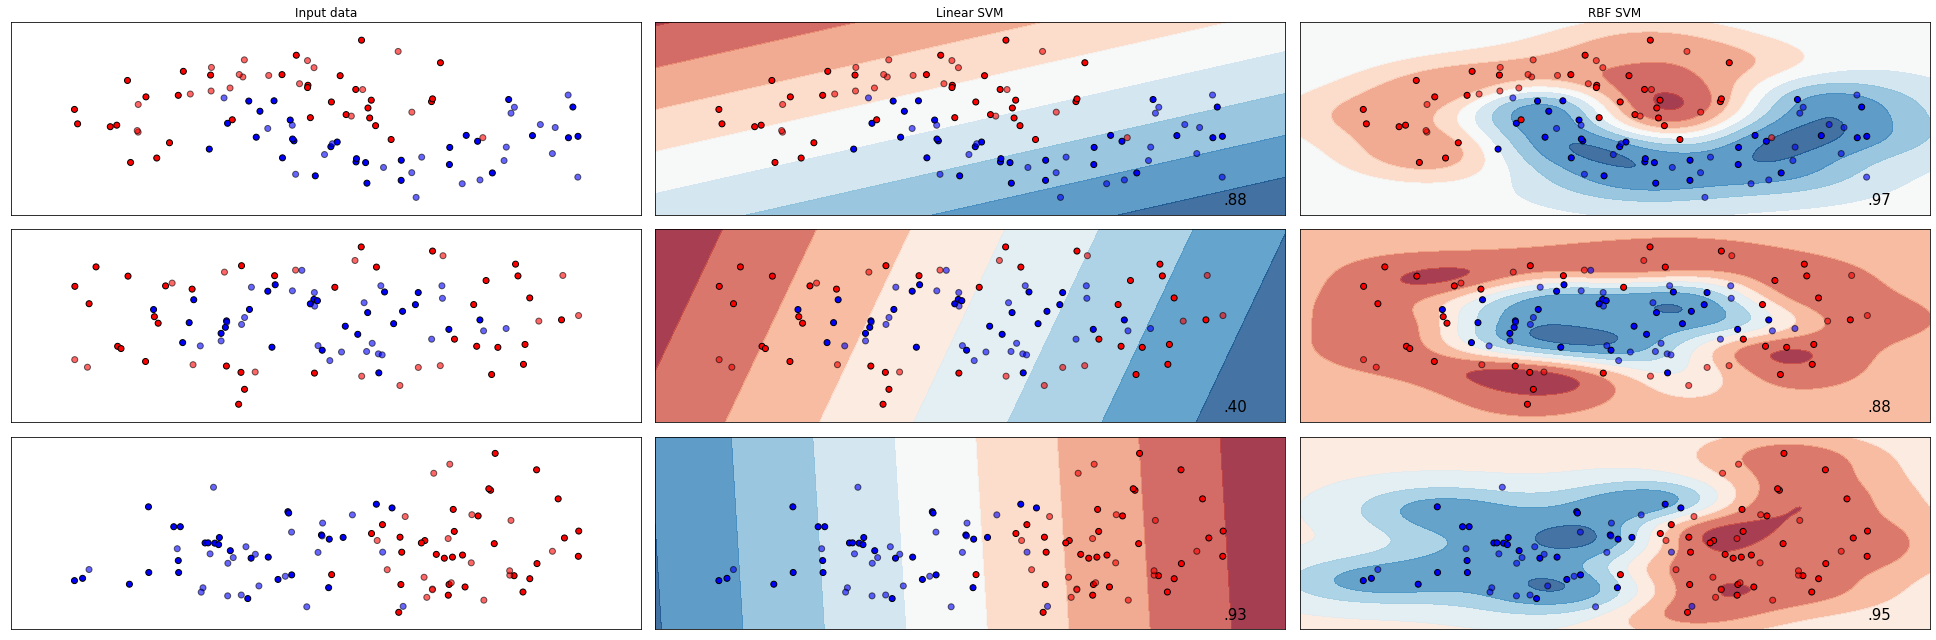

In [13]:
# Illustration from the sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC


h = 0.02  # step size in the mesh

names = [
    "Linear SVM",
    "RBF SVM",
]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## Few Comments

Let us have few remarks:

* Do not forget use in-sample/out-of-sample
    * Our focus is generalisation, not explanation of the data set at hand

* Use StandardScaler (from sklearn.preprocessing)
    * It de-means and standardise variables
    * It can be easily fit on the in-sample data (do not train on out-of-sample data!)
    
* Use pipelines -- make_pipeline (from sklearn.pipeline)
    * It helps to create define workflow, easy to fit
    
* Use cross-validation to fine-tune hyperparameters
    * Grid-search or random-search
    * rbf kernel has gamma, C





In [14]:
# Simple example
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([1, 1, 4, 4])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [15]:
print(clf.predict([[0.8, -1]]))

[4]


In [16]:
# Prediction score
clf.score([[-1, -1]], [1])

1.0

***
The usual ML workflow follows (assess the model, cross-validate etc...)

***

***
## ... and the Quantum Enhancement comes in: The Quantum Kernel!
***